In [6]:
!pip install scikit-plot

###**Importing Libraries**

import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

###**Import your dataset**

# reading the .xlsx dataset into the dataframe
df = pd.read_csv("AIDA-PHQ-Updated.csv")

df.head(7)

df.columns.tolist()

###**Data further preprocessing**

import pandas as pd

# Assume df is already loaded into the DataFrame named `df`

# Ordinal mappings
ordinal_mappings = {
    'Not Applicable' : 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Applying ordinal mappings
ordinal_columns = [
    'PoorAcademicPerformanceSelfPerception',
    'AcademicCriticismSelfPerception',
    'UnsatisfiedAcademicWorkloadSelfPerception',
    'NonInterestSubjectOpinion',
    'UnhappySubjectOpinion',
    'NonInterestInstitutionOpinion',
    'UnhappyInstitutionOpinion',
    'ParentalStrictness',
    'ParentalAcademicPressure',
    'ParentalMarriagePressure',
    'ParentalCareerPressure',
    'ParentalStudyAbroadPressure',
    'ParentalUnderstanding',
    'SiblingBonding',
    'ParentalRelationshipStability',
    'PeerRelationship',
    'TeacherSupport',
    'PartnerRelationshipImpact',
    'PhysicalViolenceExperience',
    'SexualViolenceExperience',
    'VerbalViolenceExperience',
    'EmotionalViolenceExperience'
]

for col in ordinal_columns:
    df[col] = df[col].map(ordinal_mappings)

# Encode the Gender column

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

# Assuming some fields are binary or already numerically coded
# No changes required for 'Age', 'CGPA', and binary columns like 'feeling down', 'little interest', etc.

# Check for any missing values and fill them (example uses median filling for simplicity)
for col in ordinal_columns:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

df.head()

###**Feature Engineering**

# Assign features (X) and target variable (y) || y = f(x)
X = df[['Age','Gender','little interest','feeling down','Sleeping issue','feeling tired','poor appetite','feeling bad','trouble concertrating','slowness','self harm',
        'ParentalStrictness',
        'ParentalAcademicPressure',
        'ParentalMarriagePressure',
        'ParentalCareerPressure',
        'ParentalStudyAbroadPressure']]  # Features (all columns except 'Target column')
y = df['DepressionLevel']  # Target variable ('Target' column)

X.head()

###**Train Test Split** (No Need to change anything from here)

# Split dataset into train and test sets
initial_random_state = 2024
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=initial_random_state)

###**Feature Scaling**

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Define 8 different classifiers**

# Defining classifiers with determined hyperparameters
classifiers = {
    'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=1),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=1, min_samples_split=2),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=200),
    'Logistic Regression': LogisticRegression(C=100.0, solver='lbfgs'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, loss='log_loss', max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
}

# Initialize random state
initial_random_state = 2024

# Store accuracies
# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in classifiers.keys()}

### **Train and evaluate classifiers**

# Loop to change random state and evaluate models
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Evaluate each classifier
    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store evaluation metrics
        evaluation_metrics[classifier_name]['accuracy'].append(accuracy)
        evaluation_metrics[classifier_name]['precision'].append(precision)
        evaluation_metrics[classifier_name]['recall'].append(recall)
        evaluation_metrics[classifier_name]['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()



-------------KNN:-------------
Accuracy: 0.7538 ± 0.0347
Precision: 0.7578 ± 0.0426
Recall: 0.7612 ± 0.0459
F1 Score: 0.7500 ± 0.0457

-------------Decision Tree:-------------
Accuracy: 0.7077 ± 0.0325
Precision: 0.7181 ± 0.0245
Recall: 0.6763 ± 0.0418
F1 Score: 0.6853 ± 0.0243

-------------Random Forest:-------------
Accuracy: 0.8231 ± 0.0378
Precision: 0.8505 ± 0.0137
Recall: 0.7862 ± 0.0261
F1 Score: 0.8054 ± 0.0210

-------------Logistic Regression:-------------
Accuracy: 0.9654 ± 0.0115
Precision: 0.9469 ± 0.0193
Recall: 0.9481 ± 0.0191
F1 Score: 0.9446 ± 0.0153

-------------Naive Bayes:-------------
Accuracy: 0.7885 ± 0.0389
Precision: 0.8033 ± 0.0275
Recall: 0.7652 ± 0.0271
F1 Score: 0.7733 ± 0.0231

-------------SVM:-------------
Accuracy: 0.9731 ± 0.0128
Precision: 0.9575 ± 0.0132
Recall: 0.9585 ± 0.0161
F1 Score: 0.9554 ± 0.0133

-------------AdaBoost:-------------
Accuracy: 0.5654 ± 0.0261
Precision: 0.3330 ± 0.0180
Recall: 0.4711 ± 0.0176
F1 Score: 0.3869 ± 0.0173

------

In [8]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svc', SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True)),
    ('rf', RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=200)),
    ('nb', GaussianNB())
]

# Define the meta-model
meta_model = LogisticRegression(C=100.0, solver='lbfgs')

# Store evaluation metrics, use 'evaluation_metrics' instead of 'evaluation'
evaluation_metrics['Stacking'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets

for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create the stacking classifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Train the stacking classifier
    stacking_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = stacking_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    # Store evaluation metrics, use 'Stacking' as the classifier name since it's a new model
    evaluation_metrics['Stacking']['accuracy'].append(accuracy)
    evaluation_metrics['Stacking']['precision'].append(precision)
    evaluation_metrics['Stacking']['recall'].append(recall)
    evaluation_metrics['Stacking']['f1'].append(f1)




# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items(): # Use 'evaluation_metrics'
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.7538 ± 0.0347
Precision: 0.7578 ± 0.0426
Recall: 0.7612 ± 0.0459
F1 Score: 0.7500 ± 0.0457

-------------Decision Tree:-------------
Accuracy: 0.7077 ± 0.0325
Precision: 0.7181 ± 0.0245
Recall: 0.6763 ± 0.0418
F1 Score: 0.6853 ± 0.0243

-------------Random Forest:-------------
Accuracy: 0.8231 ± 0.0378
Precision: 0.8505 ± 0.0137
Recall: 0.7862 ± 0.0261
F1 Score: 0.8054 ± 0.0210

-------------Logistic Regression:-------------
Accuracy: 0.9654 ± 0.0115
Precision: 0.9469 ± 0.0193
Recall: 0.9481 ± 0.0191
F1 Score: 0.9446 ± 0.0153

-------------Naive Bayes:-------------
Accuracy: 0.7885 ± 0.0389
Precision: 0.8033 ± 0.0275
Recall: 0.7652 ± 0.0271
F1 Score: 0.7733 ± 0.0231

-------------SVM:-------------
Accuracy: 0.9731 ± 0.0128
Precision: 0.9575 ± 0.0132
Recall: 0.9585 ± 0.0161
F1 Score: 0.9554 ± 0.0133

-------------AdaBoost:-------------
Accuracy: 0.5654 ± 0.0261
Precision: 0.3330 ± 0.0180
Recall: 0.4711 ± 0.0176
F1 Score: 0.3869 ± 0.0173

------

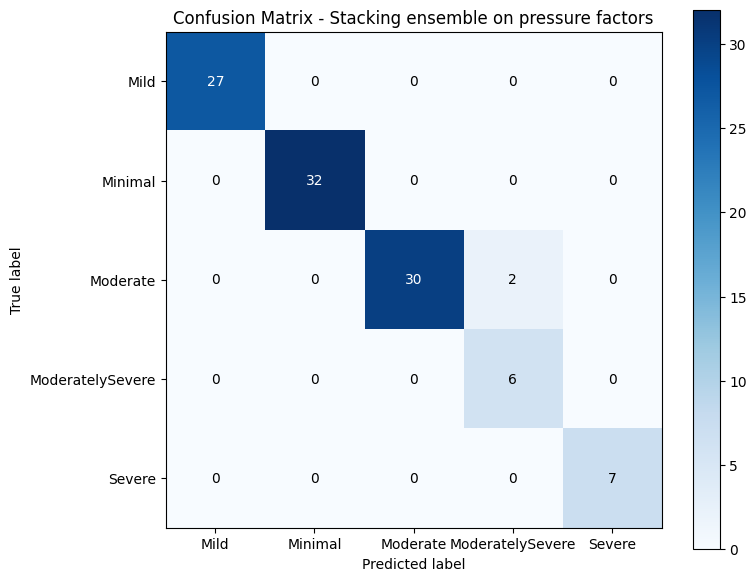

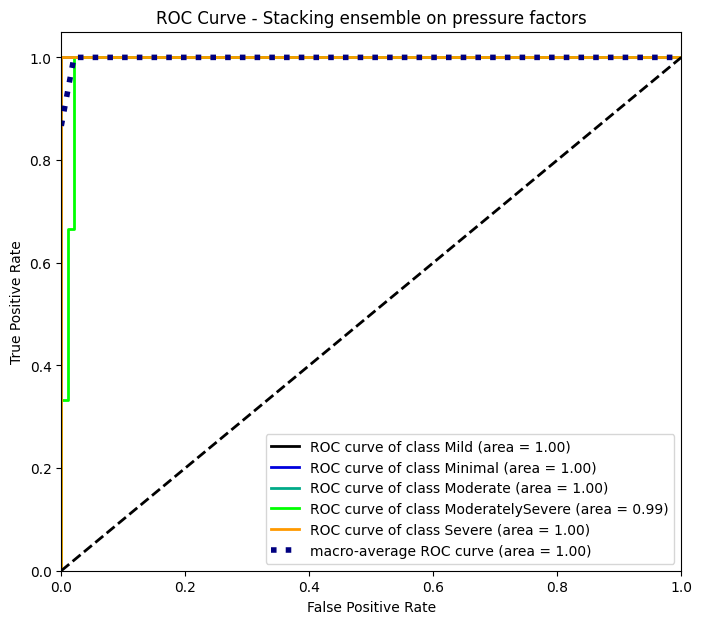

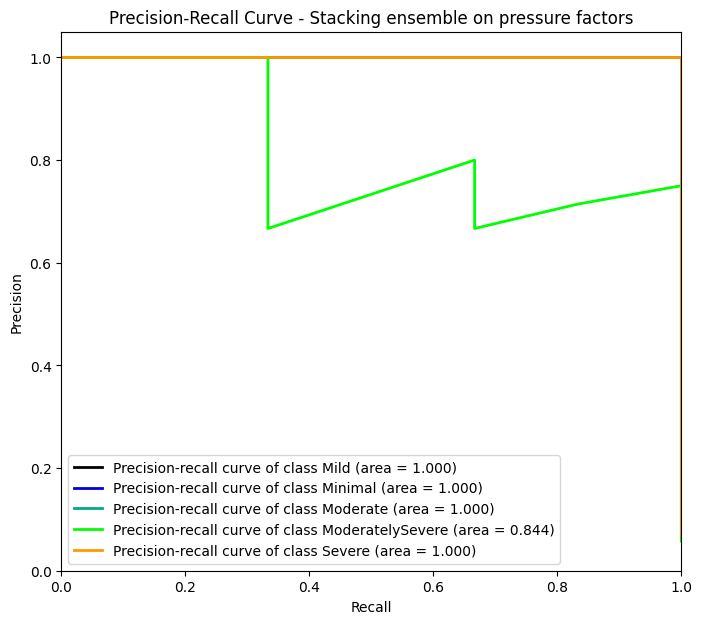

In [9]:
    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name} ensemble on pressure factors");

    # Plot ROC curve with classifier name
    y_probas = stacking_clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(8,7), plot_micro=False, plot_macro=True, title=f"ROC Curve - {name} ensemble on pressure factors");

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(8,7), plot_micro=False, title=f"Precision-Recall Curve - {name} ensemble on pressure factors");

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Define the XGBoost classifier
xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=200)

# Store evaluation metrics
evaluation_metrics['XGBoost'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Encode the target variable to numerical labels
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Train the XGBoost classifier
    xgb_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = xgb_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store evaluation metrics
    evaluation_metrics['XGBoost']['accuracy'].append(accuracy)
    evaluation_metrics['XGBoost']['precision'].append(precision)
    evaluation_metrics['XGBoost']['recall'].append(recall)
    evaluation_metrics['XGBoost']['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.7538 ± 0.0347
Precision: 0.7578 ± 0.0426
Recall: 0.7612 ± 0.0459
F1 Score: 0.7500 ± 0.0457

-------------Decision Tree:-------------
Accuracy: 0.7077 ± 0.0325
Precision: 0.7181 ± 0.0245
Recall: 0.6763 ± 0.0418
F1 Score: 0.6853 ± 0.0243

-------------Random Forest:-------------
Accuracy: 0.8231 ± 0.0378
Precision: 0.8505 ± 0.0137
Recall: 0.7862 ± 0.0261
F1 Score: 0.8054 ± 0.0210

-------------Logistic Regression:-------------
Accuracy: 0.9654 ± 0.0115
Precision: 0.9469 ± 0.0193
Recall: 0.9481 ± 0.0191
F1 Score: 0.9446 ± 0.0153

-------------Naive Bayes:-------------
Accuracy: 0.7885 ± 0.0389
Precision: 0.8033 ± 0.0275
Recall: 0.7652 ± 0.0271
F1 Score: 0.7733 ± 0.0231

-------------SVM:-------------
Accuracy: 0.9731 ± 0.0128
Precision: 0.9575 ± 0.0132
Recall: 0.9585 ± 0.0161
F1 Score: 0.9554 ± 0.0133

-------------AdaBoost:-------------
Accuracy: 0.5654 ± 0.0261
Precision: 0.3330 ± 0.0180
Recall: 0.4711 ± 0.0176
F1 Score: 0.3869 ± 0.0173

------